In [21]:
# Import libraries for preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [ ]:
# Build file path and load the cleaned pitchers dataset
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, '../..', 'data')
filepath = os.path.join(data_dir, 'cleaned/final_pitchers_df.csv')

pitchers = pd.read_csv(filepath)

In [23]:
# Preview the dataset to understand structure
pitchers.head().T

,0,1,2,3,4
row_id,abbotpa01_2003,almanar01_2003,almoned01_2003,alvarwi01_2003,batismi01_2003
playerID,abbotpa01,almanar01,almoned01,alvarwi01,batismi01
year,2003,2003,2003,2003,2003
position,P,P,P,P,P
age,36,31,27,33,32
avg_salary_year,2573472.948005,2573472.948005,2573472.948005,2573472.948005,2573472.948005
free_agent_salary,600000.0,500000.0,NaN,1500000.0,4366666.666667
contract_length,1.0,1.0,1.0,1.0,3.0
W,19.0,9.0,0.0,8.0,29.0
L,9.0,9.0,0.0,5.0,26.0


In [24]:
# Cast categorical award/position columns and log-transform salary
pitchers['won_mvp'] = pitchers['won_mvp'].astype('category')
pitchers['won_gold_glove'] = pitchers['won_gold_glove'].astype('category')
pitchers['won_cy_young'] = pitchers['won_cy_young'].astype('category')
pitchers['position'] = pitchers['position'].astype('category')
pitchers['won_silver_slugger'] = pitchers['won_silver_slugger'].astype('category')
pitchers['all_star'] = pitchers['all_star'].astype('category')
pitchers["free_agent_salary_log"] = np.log1p(pitchers["free_agent_salary"])

## Feature Selection - Lasso Regression

In [25]:
# Prepare features and target for lasso selection and drop missing rows
X = pitchers.drop(columns=["row_id", "playerID","year",'position',"contract_length","free_agent_salary","free_agent_salary_log","ZR"])
y = pitchers["free_agent_salary_log"]
df_xy = pd.concat([X, y], axis=1)

df_xy = df_xy.dropna()

X = df_xy.drop(columns=[y.name])
y = df_xy[y.name]

In [26]:
# Identify numerical and categorical feature columns
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

In [27]:
# Define alpha grid for pitching lasso cross-validation
alphas = np.logspace(-4, 4, 400)

In [28]:
# Configure preprocessing to passthrough numerics and encode categoricals
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

In [29]:
# Assemble pipeline with preprocessing, scaling, and LassoCV model
lasso = Pipeline([
    ("prep", preprocess),
    ("scale", StandardScaler()),
    ("model", LassoCV(alphas=alphas, cv=10, random_state=0))
])

In [30]:
# Fit the lasso pipeline on pitching data
lasso.fit(X, y)

c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.211e-02, tolerance: 3.752e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.557e-02, tolerance: 3.752e-02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing

,steps,"[('prep', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


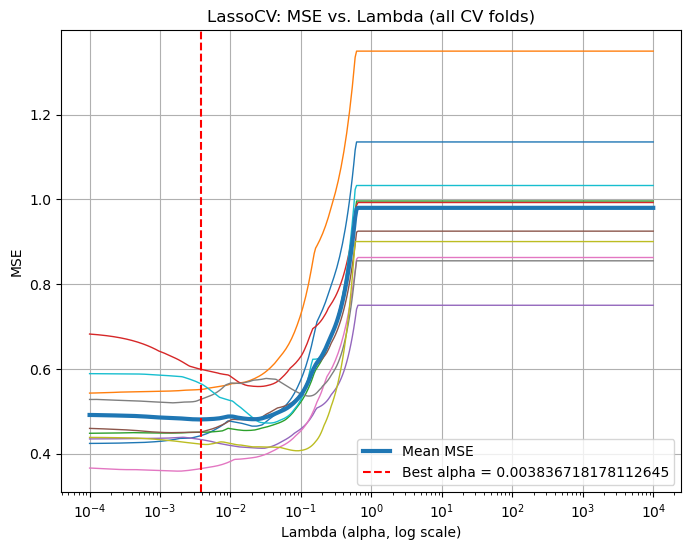

In [31]:
# Plot cross-validation MSE versus lambda to inspect penalty strength

model = lasso.named_steps["model"]

alphas = model.alphas_
mse_path = model.mse_path_

plt.figure(figsize=(8,6))

for i in range(mse_path.shape[1]):
    plt.plot(alphas, mse_path[:, i], linewidth=1)

plt.plot(alphas, mse_path.mean(axis=1), linewidth=3, label='Mean MSE')

plt.axvline(model.alpha_, color='red', linestyle='--', label=f'Best alpha = {model.alpha_}')

plt.xscale('log')
plt.xlabel("Lambda (alpha, log scale)")
plt.ylabel("MSE")
plt.title("LassoCV: MSE vs. Lambda (all CV folds)")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Build full feature name list from numeric and encoded columns
# Build the feature names
num_original = list(num_cols)
num_squared = [f"{c}^2" for c in num_cols]

# Get OHE names
ohe = lasso.named_steps["prep"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()

all_features = num_original + cat_feature_names


In [33]:
# Determine selected and discarded features based on lasso coefficients
coef = lasso.named_steps["model"].coef_

selected_features = [name for name, c in zip(all_features, coef) if c != 0]
selected_features
missing = [f for f in X if f not in selected_features]


In [34]:
# Display features removed by lasso regularization
missing

['H',
 'BFP',
 'R',
 'GIDP',
 'ERA',
 'PB',
 'WP.1',
 'won_cy_young',
 'won_mvp',
 'won_gold_glove',
 'won_silver_slugger',
 'all_star']

## Linear Regression

In [40]:
# Prepare cleaned dataset and preprocessing for linear regression
pitchers_clean = pitchers.dropna(subset=["free_agent_salary"])
X = pitchers_clean.drop(columns=["row_id", "playerID","year","free_agent_salary","free_agent_salary_log",
                          "ZR","position",'H',
 'BFP',
 'R',
 'GIDP',
 'ERA',
 'PB',
 'WP.1',
 'won_cy_young',
 'won_mvp',
 'won_gold_glove',
 'won_silver_slugger',
 'all_star'])
y = pitchers_clean["free_agent_salary_log"]

# 2) Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Identify numeric and categorical columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()

# 4) Preprocessing pipeline (impute + OHE + scaling)
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols)
    ],
    remainder="drop",
    sparse_threshold=0
)

full_pipeline = Pipeline([
    ("pre", preprocessor),
    ("scale", StandardScaler())
])

# 5) Fit pipeline on training data
full_pipeline.fit(X_train_raw)

# 6) Transform train and test sets
X_train_trans = full_pipeline.transform(X_train_raw)
X_test_trans  = full_pipeline.transform(X_test_raw)

# 7) Generate correct feature names
# numeric names
num_names = num_cols
# categorical names from OneHotEncoder

all_feature_names = num_names

# 8) Convert transformed arrays to DataFrames with correct column names
X_train_df = pd.DataFrame(X_train_trans, columns=all_feature_names, index=X_train_raw.index)
X_test_df  = pd.DataFrame(X_test_trans,  columns=all_feature_names, index=X_test_raw.index)

# 9) Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train_df, y_train)

# 10) Predict and evaluate
y_pred = lr.predict(X_test_df)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.5f}")
print(f"Test R^2: {r2:.5f}")

# 11) Coefficient DataFrame
coef_df = pd.DataFrame({"feature": all_feature_names, "coefficient": lr.coef_})
print(coef_df.sort_values("coefficient", key=lambda s: s.abs(), ascending=False).head(20))

# 12) Optional: statsmodels OLS summary
X_train_sm = sm.add_constant(X_train_df)
ols_res = sm.OLS(y_train, X_train_sm).fit()
print(ols_res.summary())

Test MSE: 0.40303
Test R^2: 0.62828
            feature  coefficient
6                GS     0.588935
10               ER    -0.420470
2   contract_length     0.344608
9                SV     0.320542
22          InnOuts     0.307597
3                 W     0.202001
5                 G     0.138588
18               GF    -0.129157
1   avg_salary_year     0.128493
4                 L     0.116493
11               HR    -0.114913
7                CG    -0.114870
12               BB    -0.112439
8               SHO     0.107382
16              HBP    -0.104968
14              IBB    -0.061460
13               SO     0.060951
21            BAOpp    -0.042214
26               DP     0.032758
0               age     0.031859
                              OLS Regression Results                             
Dep. Variable:     free_agent_salary_log   R-squared:                       0.651
Model:                               OLS   Adj. R-squared:                  0.623
Method:                  

In [ ]:
# Placeholder cell reserved for additional diagnostics


Looking at out outputs, we see a test R^squared of 0.63, meaning that our model explains about 63% of the variation in each free agent's salary. This indicates that our model does a decent job at predicting free agent salary. Our model's transformed MSE is 0.403, meaning after retransforming, our models are off by a factor of about 1.9. This leads a bit to be desired, but overall isn't terrible at predicting pitcher's salaries. Overall, our feature directions makes sense, as statistics that are thought of as good, like Innings, Saves, and and strikeouts have a positive relationship, and statistics that are thought of as bad, like home runs and earned runs see a negative relationship. Looking at our features, we see that some of our very strong predictors appear to be volume based, features like innings pitched, saves, and wins. 

## Assumptions

In [36]:
# Compute residuals and fitted values from the OLS model
residuals = ols_res.resid
fitted = ols_res.fittedvalues

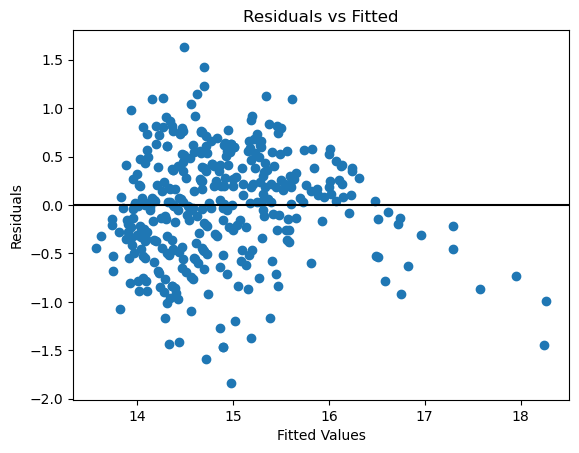

In [37]:
# Plot residuals versus fitted values for diagnostic checks
plt.scatter(fitted, residuals)
plt.axhline(0, color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

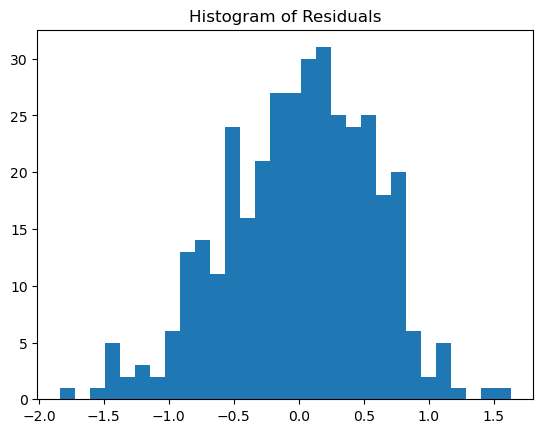

In [38]:
# Plot histogram of residuals to inspect distributional assumptions
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

Looking at our graphs, our assumptions for linear regression appear to pass. I don't see a clear an obvious fanning out, in the residual graphs, and the histogram of residuals appear normal

## Actual vs Predicted

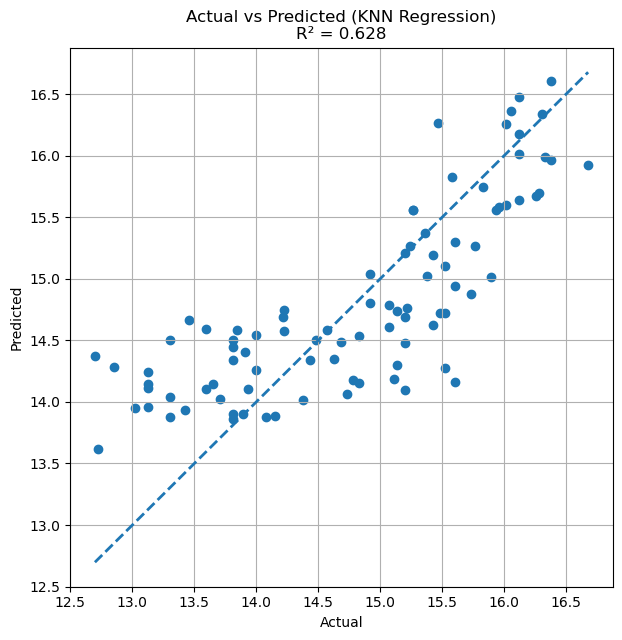

In [39]:
# Visualize actual versus predicted salaries for the linear regression model
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted (KNN Regression)\nR² = {r2:.3f}")
plt.grid(True)
plt.show()